# Lab 6: Visualizing the training process of neural networks. Hyperparameter tuning.

In this lab, you will learn how to use [wandb](https://wandb.ai/) to visualize the training process of neural networks. We are going to build and train a feed-forward neural network for recognizing handwritten digits of the MNIST dataset. The training process will be visualized in the wandb dashboard, which will allow us to monitor the loss and accuracy of the model in real-time.

---



Feel free to create an account at [wandb.ai](https://wandb.ai/) before starting this lab.

### A simple example of how to use wandb in a typical training loop is shown below:

```python
import wandb

wandb.login() # Log in to your wandb account

# Start a new run

some_config = {
    'learning_rate': 0.01,
    'layer_1_size': 128,
    'layer_2_size': 64,
    'batch_size': 32
} # This is just an example of a configuration dictionary, you can put anything you want here

wandb.init(project='mnist-classifier', config=some_config) # start a new run and log parameters

# Here you would prepare your data, and initialize the model, optimizer, etc.

# Training loop
for epoch in range(100):
    ...
    wandb.log({'loss': loss, 'accuracy': accuracy})
    # This will send the loss and accuracy to wandb and you can visualize it in the dashboard

# End of the run
wandb.finish()
```

The most important part is the `wandb.log()` function, which sends the data to the wandb dashboard. You can log any metric you want, not just loss and accuracy. The value passed to the function must be a dictionary.


## Exercise 1: Prepare data for training a mnist classifier (2 points)

Before you start training a neural network, you need to prepare the data. In this exercise, you will prepare the MNIST dataset of handwritten digits for training a classifier. You should:

1. Load the MNIST dataset using from `data/mnist_train.csv` and `data/mnist_test.csv` files.
2. Normalize the data to the range [0, 1].
3. Encode the labels using one-hot encoding.
4. Create a PyTorch `Dataset` object for the training and test sets.
5. Create a PyTorch `DataLoader` object for the training and test sets.

In [7]:
# Your code goes here
import pandas as pd
train = pd.read_csv('data/mnist-train.csv')
test = pd.read_csv('data/mnist-test.csv')

Y_train = train['label']
X_train = train.drop('label', axis=1)

Y_test = test['label']
X_test = test.drop('label', axis=1)

#print(X_train.shape, Y_train.shape)

y_train = pd.get_dummies(Y_train)
y_test = pd.get_dummies(Y_test)
y_train

,0,1,2,3,4,5,6,7,8,9
0,False,False,False,False,False,True,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
59995,False,False,False,False,False,False,False,False,True,False
59996,False,False,False,True,False,False,False,False,False,False
59997,False,False,False,False,False,True,False,False,False,False
59998,False,False,False,False,False,False,True,False,False,False


## Exercise 2: Prepare the architecture of the neural network (2 points)

In this exercise, you will prepare the architecture of the neural network. You should:

1. Create a neural network class that inherits from `torch.nn.Module`.
2. The neural network should have at least one hidden layer.
3. Use ReLU activation functions after each but the output layer.
4. Use a softmax activation function in the output layer to get the probabilities of each class.

**Feel free to experiment with the architecture of your network** - try adding more hidden layers, changing the number of neurons in each layer, etc. You can also add a dropout layer or some other regularization technique and see if it improves the performance of your model.

In [11]:
# Your code goes here
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn

X_train_std = X_train/255
X_test_std = X_test/255

X_train_t = torch.tensor(X_train_std.to_numpy(), dtype=torch.float32)
Y_train_t = torch.tensor(y_train.to_numpy(), dtype=torch.float32)

X_test_t = torch.tensor(X_test_std.to_numpy(), dtype=torch.float32)
Y_test_t = torch.tensor(y_test.to_numpy(), dtype=torch.float32)

train = TensorDataset(X_train_t, Y_train_t)
test = TensorDataset(X_test_t, Y_test_t)

train_loader = DataLoader(train, batch_size=32, shuffle=True)
test_loader = DataLoader(test, batch_size=132, shuffle=False)

X, y = next(iter(train_loader))

print("X is a tensor of shape:", X.shape)
print("y is a tensor of shape:", y.shape)
print(X)
print()
print(y)

X is a tensor of shape: torch.Size([32, 784])
y is a tensor of shape: torch.Size([32, 10])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
    

tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

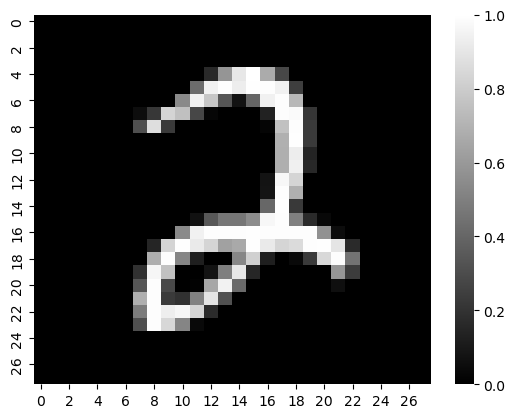

In [12]:
import seaborn as sns
sns.heatmap(X[0].reshape(28, 28), cmap='gray')
y[0]

In [16]:
class NeuralNetwork(nn.Module):
    def __init__(self, hidden_size_1, hidden_size_2):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(784, hidden_size_1)
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)
        self.fc3 = nn.Linear(hidden_size_2, 10)
        self.relu = nn.ReLU()
        self.output = nn.Softmax(dim=1)
        
    def forward(self, x):
        h = self.fc1(x)
        h = self.relu(h)
        h = self.fc2(h)
        h = self.relu(h)
        h = self.fc3(h)
        return self.output(h)



## *Training PyTorch models on GPU

**GPUs are optimized for performing matrix operations in parallel.** Although we call them "graphics processing units", they are actually very powerful processors that can be used for any kind of parallel computation, including training deep neural networks. In fact, data science is one of the most common applications of GPUs today, as can be seen by the revenue of companies like NVIDIA over the past few years. NVIDIA is a monopolist in the GPU market - in 2023, the company owned 92% of the data center GPU market share. As for 31 July, the 2024 revenue of NVIDIA was 60.92 billion USD, while the total revenue of 2020 was $10.92 billion. If someone benefits from the current deep learning hype, it is certainly NVIDIA.

If you happen to have an NVIDIA GPU in your computer, you can use it to train your deep learning models, as PyTorch has excellent support for CUDA, which is NVIDIA's parallel computing API. To train a model on GPU, you need to explicitly tell PyTorch to move the model and the data to the GPU. 

Here is an example training loop that uses the GPU:

```python
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')   # Check if a GPU is available

# Initialize the model and move it to the GPU
model = SomeNeuralNetwork().to(device)   # Move the model to the GPU

for epoch in range(100):
    for batch in data_loader:
        X, y = batch
        X, y = X.to(device), y.to(device)   # Move the tensors to GPU
        
        y_pred = model(X)   # Perform a forward pass (on the GPU)
        loss = criterion(y_pred, y)   # Compute the loss (still on the GPU)
        
        ...  # The rest of the training loop
        
        y_pred = y_pred.detach().cpu()   # Move the predictions back to the CPU to do anything else with them
```

Note that **the model and all the tensors it uses for computation should be moved to the GPU**. You can do this by calling the `.to(device)` method on the model and the data tensors. If you want to move the data back to the CPU (to process it further, calculate metrics, visualize), you call the `.cpu()` method on the tensor.

**Doing calculations on the GPU, you should be wary of few things:**

* **The GPU has a limited amount of memory**, so you should be careful not to run out of memory. A typical graphics card has a few gigabytes of memory, so you should be fine with most models and datasets. However, moving very large tensors to the GPU can cause out-of-memory errors. That's one of the reasons why we use a dataloader and process the data in batches.
* While the GPU is much faster than the CPU for large matrix operations, **transferring data between the CPU and the GPU is slow**. Therefore, it is best to minimize the number of data transfers between the CPU and the GPU.

## Exercise 3: Prepare the training loop (2 points)

In this exercise, you will prepare the training loop. You should:

1. Initialize the neural network.
2. Define the loss function.
3. Define the optimizer.
4. Pass a dictionary with the configuration to wandb. This dictionary should contain all the hyperparameters of our model, including the learning rate, the size of the hidden layers, batch size, etc.
4. Train the neural network. Each epoch should consist of a training and validation phase. You should log the loss and accuracy of the training and validation sets using wandb.
5. Open you project at [wandb.ai](https://wandb.ai/) and see how cool it is!

### Saving and loading the model
As training can take some time, it is a good idea to save the model's state dictionary (its learned weights) to a file after training. You can do this with the following code:

    torch.save(vae.state_dict(), 'vae.pth')
    
To load the model from the file, you can use the following code:

    vae.load_state_dict(torch.load('vae.pth'))

In [22]:
# Your code goes here
import wandb

def train(model, train_loader, val_loader, epochs=100):

    wandb.login(key='876dfec77c2e4a68b24ec9499a55665f94652f25')
    wandb.init(project='mnist-classifier', config={'learning_rate': 0.01, 'layer_1_size': 128, 'layer_2_size': 64, 'batch_size': 32})
    
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    loss = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()   # set the model to training mode (some layers may behave differently in training and evaluation)
        train_loss = 0  # this variable will accumulate the training loss
        
        for X_batch, y_batch in train_loader:   # load data batch-by-batch; trzeba dzielić na batche, bo karty graficzne mają ograniczoną pamięć VRAM.
            #Jakbyśmy nie mieli batche, to gradienty po całym datasecie byłyby zawsze takie same. Przez to, że mamy różne dane w batchach to spadek jest losowy
            #(stochastyczny gradient) i może wyjdziemy z lokalnych minimów.
            
            optimizer.zero_grad()   # clear the gradients
            y_pred = model(X_batch)  # forward pass
            batch_loss = loss(y_pred, y_batch) # compute the loss
            batch_loss.backward()   # compute the gradients
            optimizer.step()    # update the weights
            
            train_loss += batch_loss.item() # accumulate training loss
        
        train_loss = train_loss / len(train_loader) # compute the average loss
        print(f'Epoch: {epoch}')
        print(f'Train loss: {train_loss}')
                  
        model.eval()    # set the model to evaluation mode
        val_loss = 0    # this variable will accumulate the validation loss
        
        for X_batch, y_batch in val_loader:
            
            y_pred = model(X_batch)
            val_loss += loss(y_pred, y_batch).item()    # accumulate validation loss
            
        val_loss = val_loss / len(val_loader)
        print(f'Validation loss: {val_loss}')
        wandb.log({'train_loss': train_loss, 'val_loss': val_loss})
        
    return model

model = NeuralNetwork(128, 64)
train(model, train_loader, test_loader)

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\admin\_netrc
wandb: Currently logged in as: tiopirfur (tiopirfur-uniwersytet-jagiello-ski-w-krakowie). Use `wandb login --relogin` to force relogin


Epoch: 0
Train loss: 1.6155208134969075
Validation loss: 1.5371696729409068
Epoch: 1
Train loss: 1.523804834683736
Validation loss: 1.5112780928611755
Epoch: 2
Train loss: 1.508758923403422
Validation loss: 1.5025741881445835
Epoch: 3
Train loss: 1.4996286329269408
Validation loss: 1.494748415131318
Epoch: 4
Train loss: 1.4943297377904257
Validation loss: 1.4931037676961798
Epoch: 5
Train loss: 1.4893020144780478
Validation loss: 1.4906071220573627
Epoch: 6
Train loss: 1.4865883273442586
Validation loss: 1.4944061307530654
Epoch: 7
Train loss: 1.484776527150472
Validation loss: 1.4917925298213959
Epoch: 8
Train loss: 1.4834686218897501
Validation loss: 1.4905075195588564
Epoch: 9
Train loss: 1.4809174185434977
Validation loss: 1.4895672798156738
Epoch: 10
Train loss: 1.4791995577494303
Validation loss: 1.486901774218208
Epoch: 11
Train loss: 1.4786795873641967
Validation loss: 1.4861769927175421
Epoch: 12
Train loss: 1.478247556622823
Validation loss: 1.4915296058905751
Epoch: 13
Train

KeyboardInterrupt: 

## Exercise 4: Easy hyperparameter tuning with wandb (2 points)

Wandb allows you to perform hyperparameter tuning by automatically creating multiple runs with different hyperparameters and logging the performance of each run. Below is a brief instruction to `wandb` hyperparameter tuning, but you are more than welcome to find more information in the [official wandb guide](https://docs.wandb.ai/guides/sweeps/).

Your task is to use wandb to perform hyperparameter tuning of the neural network, trying different values of the learning rate, batch size, and the size of the hidden layers. You can use the following hyperparameters:

First, we need to define a dictionary with the hyperparameters that we want to tune. For example:

```python
parameters = {
    'learning_rate': {'values': [0.01, 0.001, 0.0001]},
    'batch_size': {'values': [32, 64, 128]},
    'layer_1_size': {'values': [64, 128, 256]},
    'layer_2_size': {'values': [32, 64, 128]}
}
```

Then we need to create a dictionary with the configuration of the run:

```python
sweep_config = {
    'name': 'mnist-sweep',
    'method': 'grid',   # grid search, you can also try 'random' or 'bayes'
    'metric': {'goal': 'minimize', 'name': 'val_loss'},
    'parameters': parameters,   # that's the dictionary with the hyperparameters
}
```

Finally, we can use the `wandb.sweep` function to perform hyperparameter tuning:

```python
sweep_id = wandb.sweep(sweep_config, project='mnist-classifier')
```

After that, we can finally run the sweep:

```python
wandb.agent(sweep_id, function=train)
```
where `train` is a function that trains the model and logs the metrics to wandb. This function should take a `config` argument, which will contain the hyperparameters of the run. That is how wandb knows which hyperparameters to tune.

1. Rewrite the VAE training loop into a function that takes a single dictionary `parameters` as an argument, initializes the model, optimizer, and criterion, and trains the model for a fixed number of epochs. The function should log the loss and accuracy of the training and validation sets to wandb.
2. Create a dictionary with the hyperparameters that you want to tune.
3. Create a sweep configuration dictionary.
4. Run the sweep and monitor the results in the wandb dashboard.

In [ ]:
import wandb

def train(parameters: dict):
    # your code goes here
    ...

In [ ]:
parameters = {...}

sweep_config = {
    'name': 'mnist-sweep',
    'method': 'bayes',
    'metric': {'goal': 'maximize', 'name': 'accuracy'}, # if we want to maximize the accuracy
    # remember to log the metric that you want to maximize or minimize!
    'parameters': parameters,
}

sweep_id = wandb.sweep(sweep_config, project='mnist-classifier')    # This will create a new sweep
wandb.agent(sweep_id, function=train)   # This will start the hyperparameter tuning process